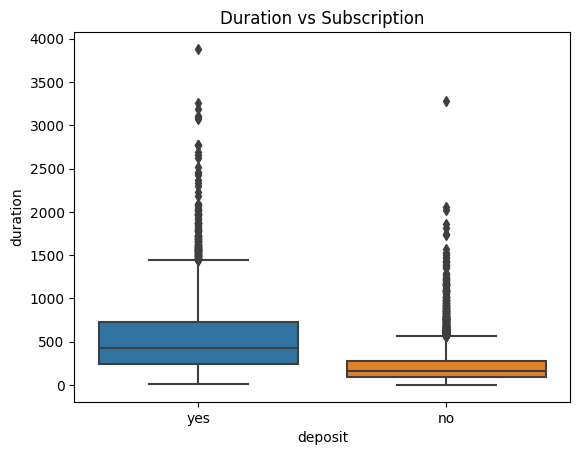

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("bank.csv")

# Analyze relationship between duration and subscription
sns.boxplot(x='deposit', y='duration', data=data)
plt.title('Duration vs Subscription')
plt.show()


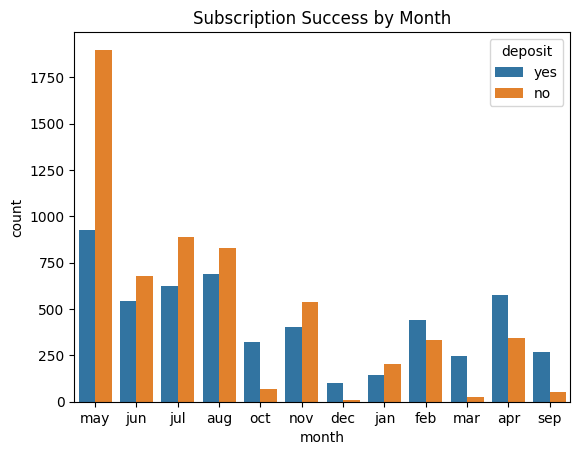

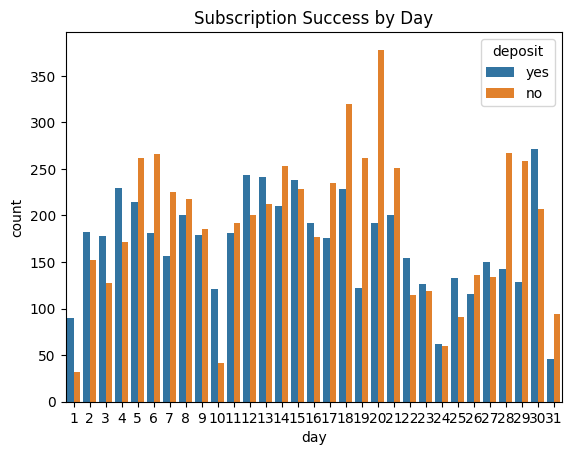

In [ ]:
# Influence of month on success
sns.countplot(x='month', hue='deposit', data=data)
plt.title('Subscription Success by Month')
plt.show()

# Influence of day of the week on success
sns.countplot(x='day', hue='deposit', data=data)
plt.title('Subscription Success by Day')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data preprocessing
le = LabelEncoder()
data['deposit'] = le.fit_transform(data['deposit'])
data = pd.get_dummies(data)  # Convert categorical variables to numerical

# Define features and target
X = data.drop('deposit', axis=1)
y = data['deposit']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare classification algorithms (e.g., RandomForestClassifier)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForestClassifier:", accuracy)


Accuracy of RandomForestClassifier: 0.83833407971339


In [ ]:
# Identify and handle outliers using z-score
from scipy import stats

# Assuming 'duration' as a column to detect outliers
z_scores = stats.zscore(data['duration'])
threshold = 3
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]

# Remove outliers
clean_data = data[(z_scores < threshold) & (z_scores > -threshold)]
